## Problem: If a contractor is trying to start their own business, where would you recommend that they setup their business?

### Name of the final project: Coursera Capstone Project — The Battle of Neighborhoods

### Background: 
   Brooklyn’s demographics show that it is a large and ethnically diverse metropolis. It is the largest borough in the New York with a long history of international immigration. Borough has grown by 2,916 since 2015, which represents a 0.76% annual change.  Over the last decade, the borough has been growing faster than the city. Brooklyn continues to be by far the leading metropolitan gateway for legal immigrants admitted into the New york City. 

### As part of the final project, I have chosen to explore what kind of business in the city of New York in Brooklyn.


### Introduction:


Business Problem:
    In this scenario, it is urgent to adopt machine learning tools in order to assist businessman  in Brooklyn to make wise and effective decisions. As a result, the business problem we are currently posing is: how could we provide support to people who want to buy food from many restaurants in Brooklyn during the lockdown ?

   To solve this business problem, we are going to cluster Brooklyn neighborhoods in order to recommend venues people can buy food. We will recommend profitable venues according to amenities and essential facilities surrounding.

### Data Selection:
For this project we need the following data:
    The New York City data that contains list Boroughs, Neighborhoods along with their latitude and longitude.
Data source: Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.
Luckily, this dataset exists for free on the web. Feel free to try to find this dataset on your own, but here is the link to the dataset:
https://geo.nyu.edu/catalog/nyu_2451_34572
### Description: 
   This data set contains the required information. And we will use this data set to explore various neighborhoods of Brooklyn.
### Data source: 
   Foursquare API
### Description: 
   By using this application we will get all the venues in each neighborhood. We can filter all companies, according to the amaount of venue category our businessman can decide what kind of business they shoul run into there.
### Data Soruce:
   Geospace:
   Use geopy library to get the latitude and longitude values of New York City.
### Description: 
   By using this geo space data we will get Brooklyn  boundaries that will help us visualize choropleth map.

### Approach:
   Using Foursquare API we will find all venues for each neighborhood


## Methodology section
##### The Methodology section will describe the main components of our analysis and predication system. The Methodology section comprises four stages:
1.	Download and Explore Dataset
2.	Explore Neighborhoods in Brooklyn
3.	Analyze Each Neighborhood

### Analysis:
   We will import the required libraries for python.
   
   Pandas and NumPy for handling data.
   
   Request module for using Foursquare API.
   
   Goopy to get co-ordinates of City of New York.
   
   Folium to visualize the results on a map Results



In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 1. Download and Explore Dataset

In [4]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [10]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

### Transform the data to the pandas

In [11]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [13]:
neighborhoods_data = newyork_data['features']

In [14]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [15]:
neighborhoods.groupby('Borough').count()

,Neighborhood,Latitude,Longitude
Borough,,,
Bronx,52,52,52
Brooklyn,70,70,70
Manhattan,40,40,40
Queens,81,81,81
Staten Island,63,63,63


### It is observed that Brooklyn is the second city which has huge amount of neighborhoods so we go on our analsys with Brooklyn.

In [16]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Brooklyn. So let's slice the original dataframe and create a new dataframe of the Brooklyn data.

In [17]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


### Let's get the geographical coordinates of Brooklyn.

In [19]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


### Let's vizualize the data for Brooklyn

In [20]:
# create map of Manhattan using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

### Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [22]:
CLIENT_ID = 'Z5RAXUV0SIMOH2JAUP4BZCGVH50B5ZSJUP52IVCIX3FW4PTT' # your Foursquare ID
CLIENT_SECRET = 'FFCOVUSTEXGGPG5JBLSD5EO1N1DRNRKVW5V5Y4J2RG4QYDZW' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Z5RAXUV0SIMOH2JAUP4BZCGVH50B5ZSJUP52IVCIX3FW4PTT
CLIENT_SECRET:FFCOVUSTEXGGPG5JBLSD5EO1N1DRNRKVW5V5Y4J2RG4QYDZW


## 2. Explore Neighborhoods in Brooklyn

#### Let's create a function all the neighborhoods in Brooklyn

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *brooklyn_venues*.

In [37]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


#### Let's check the size of the resulting dataframe

In [38]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2745, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Leo's Casa Calamari,40.624200,-74.030931,Pizza Place
4,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot


#### Let's check how many venues were returned for each neighborhood

In [43]:
brooklyn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,48,48,48,48,48,48
Bay Ridge,83,83,83,83,83,83
Bedford Stuyvesant,26,26,26,26,26,26
Bensonhurst,31,31,31,31,31,31
Bergen Beach,6,6,6,6,6,6
Boerum Hill,90,90,90,90,90,90
Borough Park,25,25,25,25,25,25
Brighton Beach,44,44,44,44,44,44
Broadway Junction,16,16,16,16,16,16


#### Let's find out how many unique categories can be curated from all the returned venues

In [41]:
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 288 uniques categories.


#### Let's check how many venues were returned for each Venue Category

In [44]:
brooklyn_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Accessories Store,1,1,1,1,1,1
African Restaurant,1,1,1,1,1,1
Airport Terminal,1,1,1,1,1,1
American Restaurant,42,42,42,42,42,42
Antique Shop,7,7,7,7,7,7
Arepa Restaurant,2,2,2,2,2,2
Argentinian Restaurant,2,2,2,2,2,2
Art Gallery,19,19,19,19,19,19
Arts & Crafts Store,9,9,9,9,9,9


## 3. Analyze Each Neighborhood

In [46]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Yoga Studio,Accessories Store,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Rest

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [47]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped

,Neighborhood,Yoga Studio,Accessories Store,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Rest

#### Let's print each neighborhood along with the top 5 most common venues

In [49]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                  venue  freq
0           Pizza Place  0.06
1              Pharmacy  0.06
2           Gas Station  0.04
3  Cantonese Restaurant  0.04
4  Fast Food Restaurant  0.04


----Bay Ridge----
                venue  freq
0                 Spa  0.06
1  Italian Restaurant  0.06
2         Pizza Place  0.06
3       Grocery Store  0.04
4  Chinese Restaurant  0.04


----Bedford Stuyvesant----
                 venue  freq
0          Coffee Shop  0.12
1                 Café  0.08
2                  Bar  0.08
3          Pizza Place  0.08
4  Japanese Restaurant  0.04


----Bensonhurst----
                venue  freq
0  Chinese Restaurant  0.16
1         Pizza Place  0.10
2      Ice Cream Shop  0.06
3  Italian Restaurant  0.06
4    Sushi Restaurant  0.06


----Bergen Beach----
                venue  freq
0     Harbor / Marina  0.33
1      Baseball Field  0.17
2  Athletics & Sports  0.17
3        Hockey Field  0.17
4          Playground  0.17


----Boerum Hill----
       

##### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [118]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_new = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_new['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted_new.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_new.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Pizza Place,Pharmacy,Chinese Restaurant,Cantonese Restaurant,Fast Food Restaurant,Italian Restaurant,Gas Station,Sushi Restaurant,Bubble Tea Shop,German Restaurant
1,Bay Ridge,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Greek Restaurant,American Restaurant,Chinese Restaurant,Grocery Store,Bar,Ice Cream Shop
2,Bedford Stuyvesant,Coffee Shop,Pizza Place,Café,Bar,Wine Bar,Boutique,Cocktail Bar,Bagel Shop,BBQ Joint,Thrift / Vintage Store
3,Bensonhurst,Chinese Restaurant,Pizza Place,Italian Restaurant,Donut Shop,Sushi Restaurant,Ice Cream Shop,Cosmetics Shop,Bagel Shop,Hotpot Restaurant,Liquor Store
4,Bergen Beach,Harbor / Marina,Baseball Field,Hockey Field,Playground,Athletics & Sports,Event Space,Eye Doctor,Factory,Falafel Restaurant,Farm


## 4. Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [119]:
# set number of clusters
kclusters = 3

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 0], dtype=int32)

In [120]:
# add clustering labels
neighborhoods_venues_sorted_new.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_merged = brooklyn_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted_new.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,0,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Greek Restaurant,American Restaurant,Chinese Restaurant,Grocery Store,Bar,Ice Cream Shop
1,Brooklyn,Bensonhurst,40.611009,-73.995180,0,Chinese Restaurant,Pizza Place,Italian Restaurant,Donut Shop,Sushi Restaurant,Ice Cream Shop,Cosmetics Shop,Bagel Shop,Hotpot Restaurant,Liquor Store
2,Brooklyn,Sunset Park,40.645103,-74.010316,2,Latin American Restaurant,Bakery,Bank,Pizza Place,Mobile Phone Shop,Mexican Restaurant,Gym,Fried Chicken Joint,Pharmacy,Sandwich Place
3,Brooklyn,Greenpoint,40.730201,-73.954241,0,Bar,Pizza Place,Cocktail Bar,Coffee Shop,Yoga Studio,Mexican Restaurant,Sushi Restaurant,Café,French Restaurant,Deli / Bodega
4,Brooklyn,Gravesend,40.595260,-73.973471,0,Pizza Place,Bakery,Lounge,Italian Restaurant,Chinese Restaurant,Deli / Bodega,Furniture / Home Store,Men's Store,Eastern European Restaurant,Fish Market


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

Finally, let's visualize the resulting clusters

In [121]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

In [130]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Greek Restaurant,American Restaurant,Chinese Restaurant,Grocery Store,Bar,Ice Cream Shop
1,Bensonhurst,Chinese Restaurant,Pizza Place,Italian Restaurant,Donut Shop,Sushi Restaurant,Ice Cream Shop,Cosmetics Shop,Bagel Shop,Hotpot Restaurant,Liquor Store
3,Greenpoint,Bar,Pizza Place,Cocktail Bar,Coffee Shop,Yoga Studio,Mexican Restaurant,Sushi Restaurant,Café,French Restaurant,Deli / Bodega
4,Gravesend,Pizza Place,Bakery,Lounge,Italian Restaurant,Chinese Restaurant,Deli / Bodega,Furniture / Home Store,Men's Store,Eastern European Restaurant,Fish Market
6,Sheepshead Bay,Dessert Shop,Turkish Restaurant,Sandwich Place,Grocery Store,Diner,Creperie,Outlet Store,Restaurant,Chinese Restaurant,Russian Restaurant
9,Crown Heights,Pizza Place,Museum,Café,Bakery,Grocery Store,Playground,Fried Chicken Joint,Farmers Market,Supermarket,Candy Store
11,Kensington,Thai Restaurant,Grocery Store,Ice Cream Shop,Pizza Place,Bagel Shop,Sandwich Place,Lingerie Store,Liquor Store,Spa,Mexican Restaurant
12,Windsor Terrace,Diner,Grocery Store,Plaza,Café,Park,Italian Restaurant,Beer Store,Sushi Restaurant,Bookstore,Salad Place
13,Prospect Heights,Bar,Mexican Restaurant,Thai Restaurant,Café,Wine Shop,Bakery,Cocktail Bar,New American Restaurant,Gourmet Shop,Diner
14,Brownsville,Restaurant,Chinese Restaurant,Moving Target,Pool,Fried Chicken Joint,Pizza Place,Performing Arts Venue,Park,Burger Joint,Plaza


In [123]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Mill Island,Pool,Other Repair Shop,Women's Store,Fast Food Restaurant,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Field


In [124]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Sunset Park,Latin American Restaurant,Bakery,Bank,Pizza Place,Mobile Phone Shop,Mexican Restaurant,Gym,Fried Chicken Joint,Pharmacy,Sandwich Place
5,Brighton Beach,Restaurant,Russian Restaurant,Beach,Eastern European Restaurant,Gourmet Shop,Sushi Restaurant,Bank,Mobile Phone Shop,Korean Restaurant,Playground
7,Manhattan Terrace,Pizza Place,Grocery Store,Donut Shop,Ice Cream Shop,Eastern European Restaurant,Jazz Club,Sushi Restaurant,Organic Grocery,Steakhouse,Coffee Shop
8,Flatbush,Caribbean Restaurant,Bank,Pharmacy,Mexican Restaurant,Coffee Shop,Sandwich Place,Chinese Restaurant,Lounge,Juice Bar,Bagel Shop
10,East Flatbush,Fast Food Restaurant,Wine Shop,Department Store,Moving Target,Print Shop,Caribbean Restaurant,Liquor Store,Pharmacy,Chinese Restaurant,Supermarket
25,Cypress Hills,Fried Chicken Joint,Ice Cream Shop,Metro Station,Chinese Restaurant,Latin American Restaurant,Donut Shop,Fast Food Restaurant,Gas Station,South American Restaurant,Pizza Place
26,East New York,Bus Station,Metro Station,Fast Food Restaurant,Salon / Barbershop,Chinese Restaurant,Gym,Fried Chicken Joint,Event Service,Caribbean Restaurant,Pharmacy
27,Starrett City,Bus Station,Caribbean Restaurant,Shopping Mall,Pizza Place,American Restaurant,Cosmetics Shop,Pharmacy,Bus Stop,Donut Shop,Factory
29,Flatlands,Pharmacy,Caribbean Restaurant,Fast Food Restaurant,Fried Chicken Joint,Bar,Lounge,Paper / Office Supplies Store,Park,Dry Cleaner,Deli / Bodega
34,Borough Park,Bank,Pizza Place,Deli / Bodega,Pharmacy,Café,Fast Food Restaurant,Toy / Game Store,Coffee Shop,Restaurant,Electronics Store


In [144]:
brooklyn_merged.groupby('Cluster Labels').count()

,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,
0,46,46,46,46,46,46,46,46,46,46,46,46,46,46
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,23,23,23,23,23,23,23,23,23,23,23,23,23,23


#### Resut: As far as we search from our cluster data, we decide that we will form a new data frame called "result_first" from first cluster(cluster label=0) because it has most neighborhood.

In [146]:
result_first=brooklyn_venues[['Neighborhood','Venue','Venue Category']]
result_first.head()

,Neighborhood,Venue,Venue Category
0,Bay Ridge,Pilo Arts Day Spa and Salon,Spa
1,Bay Ridge,Bagel Boy,Bagel Shop
2,Bay Ridge,Cocoa Grinder,Juice Bar
3,Bay Ridge,Leo's Casa Calamari,Pizza Place
4,Bay Ridge,Pegasus Cafe,Breakfast Spot


In [156]:
result_first.groupby('Neighborhood')['Venue Category'].count()


Neighborhood
Bath Beach                    48
Bay Ridge                     83
Bedford Stuyvesant            26
Bensonhurst                   31
Bergen Beach                   6
Boerum Hill                   90
Borough Park                  25
Brighton Beach                44
Broadway Junction             16
Brooklyn Heights             100
Brownsville                   16
Bushwick                      69
Canarsie                       7
Carroll Gardens              100
City Line                     33
Clinton Hill                  94
Cobble Hill                   96
Coney Island                  13
Crown Heights                 22
Cypress Hills                 30
Ditmas Park                   45
Downtown                     100
Dumbo                         63
Dyker Heights                  6
East Flatbush                 12
East New York                 14
East Williamsburg             69
Erasmus                       21
Flatbush                      22
Flatlands                     

We got 2745 neighborhoods which are so close to each other according to their properties.

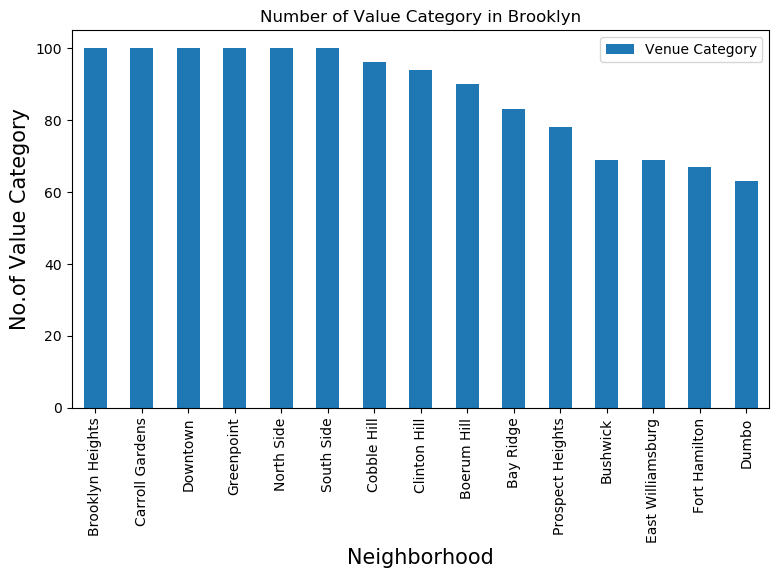

In [161]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Value Category in Brooklyn')
#On x-axis
plt.xlabel('Neighborhoods', fontsize = 15)
#On y-axis
plt.ylabel('No.of Value Category', fontsize=15)
#giving a bar plot
result_first.groupby('Neighborhood')['Venue Category'].count().nlargest(15).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

As far as analysed by Python, it is observed that 'Brooklyn Heights', 'Carrol Gardens' , 'Downtown' , 'Greenpoint' and 'North Side' are the five neighborhood which has more value categories. So we will go on our study with 'Brooklyn Heights' and we will consider 

In [175]:
brooklyn_heights=result_first[result_first['Neighborhood']=='Brooklyn Heights']
brooklyn_heights.head()

,Neighborhood,Venue,Venue Category
713,Brooklyn Heights,Brooklyn Historical Society,History Museum
714,Brooklyn Heights,Dellarocco's,Pizza Place
715,Brooklyn Heights,Emack & Bolio's,Ice Cream Shop
716,Brooklyn Heights,Area Yoga & Spa,Yoga Studio
717,Brooklyn Heights,Lassen & Hennigs,Deli / Bodega


#### On that code, we see the venue categories on brooklyn heights so we will decide what we should build according to the smallest venue.

In [195]:
brooklyn_heights.groupby('Venue Category')['Venue'].count().nsmallest(5)

Venue Category
American Restaurant    1
Athletics & Sports     1
Bagel Shop             1
Bank                   1
Beach                  1
Name: Venue, dtype: int64

#### It i is observed that there re lots of restaurant in Brooklyn Height so we should go in business that related to food services because during the lockdown even if there are lots of restaurants, if there is not much food services, these restaurants will be nonsense. 

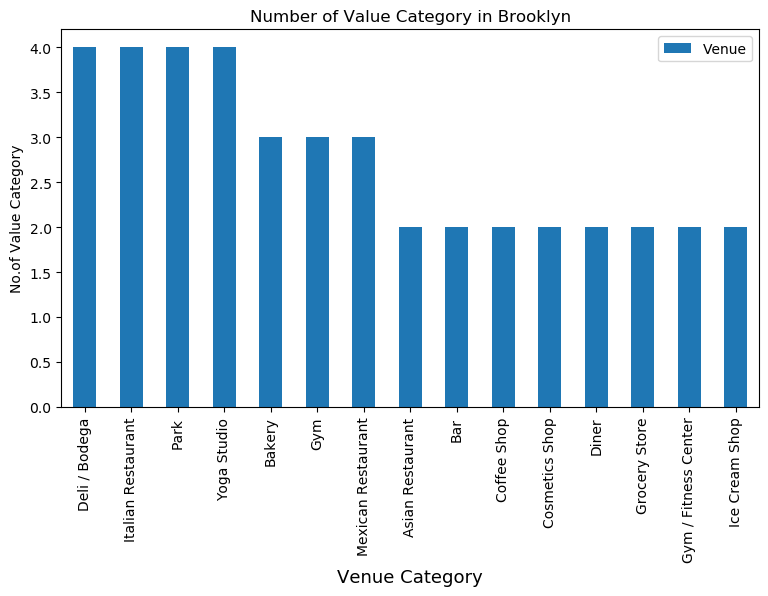

In [198]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Value Category in Brooklyn')
#On x-axis
plt.xlabel('Value Category', fontsize = 13)
#On y-axis
plt.ylabel('No.of Value Category', fontsize=10)
#giving a bar plot
brooklyn_heights.groupby('Venue Category')['Venue'].count().nlargest(15).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [199]:
brooklyn_heights.groupby('Venue Category')['Venue'].count().nsmallest(5)

Venue Category
American Restaurant    1
Athletics & Sports     1
Bagel Shop             1
Bank                   1
Beach                  1
Name: Venue, dtype: int64

#### It is observed that there are just one bank,one  Athletics & Sports, one Beach , Bagel Shop  and one American Restaurant so the areas which are related the first five smallest venue categories should not be preferred to run in business.

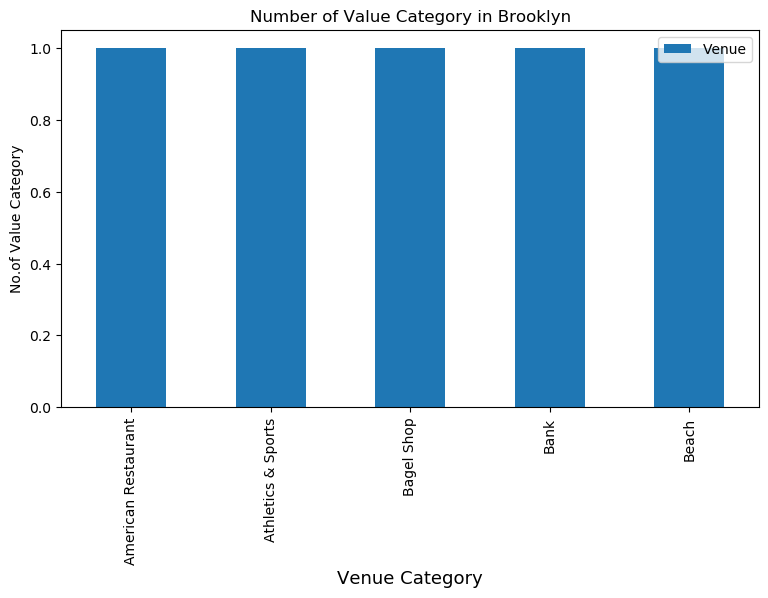

In [197]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Value Category in Brooklyn')
#On x-axis
plt.xlabel('Value Category', fontsize = 13)
#On y-axis
plt.ylabel('No.of Value Category', fontsize=10)
#giving a bar plot
brooklyn_heights.groupby('Venue Category')['Venue'].count().nsmallest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

##### Convert all data frame to csv to put the github efficiently

In [204]:
brooklyn_data.to_csv('brooklyn_data.csv', index=False)
result_first.to_csv('result_first.csv', index=False)
brooklyn_merged.to_csv('brooklyn_merged.csv', index=False)
brooklyn_heights.to_csv('brooklyn_heights.csv', index=False)

### Conclusion

Brooklyn have potential  food services

Brooklyn is the best place to stay if you prefer to run in business on food services.




#### Limitations
The ranking is purely on basis of number of venue category
The accuracy of data depends purely depends on the data provided by FourSquare